# Econometria Aplicada

## Aula 4 - Variáveis Instrumentais
---




**Motivação**:

 Como estimar uma curva de demanda? 
 
 Esta aplicação foi inspirada no texto ["Supply, Demand, and the Instrumental Variable: Lessons for Data Scientists from the Economist’s Toolbox"](https://towardsdatascience.com/supply-demand-and-the-instrumental-variable-lessons-for-data-scientists-from-the-economists-21af225187cd), utiliza dados de Epple e McCallum (2006), e nos exercícios propostos por Glenn Ellison and Stephen Ryan. 
 
 Referência: [Industrial Organization I](https://ocw.mit.edu/courses/14-271-industrial-organization-i-fall-2005/pages/assignments/)

### **Bibliotecas**

In [ ]:
install.packages("broom")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(broom) 

### **Dados**

In [ ]:
url <- "https://github.com/costafilhojoao/Teaching/raw/main/Econometria%20Aplicada/Dados/broiler.csv"

download.file(url, "broiler.csv")

In [ ]:
dat <- read.csv("broiler.csv")

Veja os primeiros 10 elementos da base de dados:

In [ ]:
head(dat, 10)

,YEAR,Q,Y,PCHICK,PBEEF,PCOR,PF,CPI,QPRODA,POP,MEATEX,TIME
,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>
1,1960,19.2,9210,52.4,33.5,46.0,51.53361,29.6,4333602,180.671,50,51
2,1961,20.6,9361,47.4,33.0,45.1,51.86824,29.9,4944130,183.691,49,52
3,1962,20.6,9666,50.0,34.2,44.8,52.09133,30.2,4997189,186.538,46,53
4,1963,21.1,9886,49.3,33.8,49.8,50.97588,30.6,5269019,189.242,80,54
5,1964,21.3,10456,48.2,32.8,49.9,50.75279,31.0,5443769,191.889,78,55
6,1965,22.9,10965,49.8,34.4,51.8,50.97588,31.5,5871560,194.303,49,56
7,1966,24.5,11417,52.7,36.2,54.5,52.48173,32.4,6437127,196.560,44,57
8,1967,25.1,11776,48.8,36.4,51.7,51.86824,33.4,6552305,198.712,45,58
9,1968,25.2,12196,51.2,37.9,45.5,49.52580,34.8,6653319,200.706,59,59


Veja os últimos 10 elementos da base de dados:

In [ ]:
tail(dat, 10)

,YEAR,Q,Y,PCHICK,PBEEF,PCOR,PF,CPI,QPRODA,POP,MEATEX,TIME
,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>
31,1990,42.4,20058,134.9,128.8,100.9,130.9534,130.7,18429897,249.973,564,81
32,1991,44.1,19873,131.7,132.4,97.0,126.6589,136.2,19591105,253.336,667,82
33,1992,46.5,20220,131.9,132.3,96.0,125.3761,140.3,20903765,256.677,786,83
34,1993,48.2,20235,138.0,137.1,92.9,131.3995,144.5,22014911,260.037,780,84
35,1994,48.8,20507,140.1,136.0,100.1,136.4748,148.2,23666035,263.226,980,85
36,1995,48.2,20798,142.2,134.9,109.0,138.4826,152.4,24827130,266.364,1183,86
37,1996,48.8,21072,152.6,134.5,158.5,174.3442,156.9,26123767,269.485,1291,87
38,1997,49.5,21470,158.5,136.8,110.1,157.7798,160.5,27041394,272.756,1443,88
39,1998,49.8,22359,159.6,136.5,91.7,128.9456,163.0,27612361,275.955,1543,89


Veja a estrutura dos dados:

In [ ]:
str(dat)

'data.frame':	40 obs. of  12 variables:
 $ YEAR  : int  1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 ...
 $ Q     : num  19.2 20.6 20.6 21.1 21.3 22.9 24.5 25.1 25.2 26.3 ...
 $ Y     : int  9210 9361 9666 9886 10456 10965 11417 11776 12196 12451 ...
 $ PCHICK: num  52.4 47.4 50 49.3 48.2 49.8 52.7 48.8 51.2 54.1 ...
 $ PBEEF : num  33.5 33 34.2 33.8 32.8 34.4 36.2 36.4 37.9 41.7 ...
 $ PCOR  : num  46 45.1 44.8 49.8 49.9 51.8 54.5 51.7 45.5 49.3 ...
 $ PF    : num  51.5 51.9 52.1 51 50.8 ...
 $ CPI   : num  29.6 29.9 30.2 30.6 31 31.5 32.4 33.4 34.8 36.7 ...
 $ QPRODA: int  4333602 4944130 4997189 5269019 5443769 5871560 6437127 6552305 6653319 7174882 ...
 $ POP   : num  181 184 187 189 192 ...
 $ MEATEX: int  50 49 46 80 78 49 44 45 59 87 ...
 $ TIME  : int  51 52 53 54 55 56 57 58 59 60 ...


#### **Variáveis:**

* YEAR: ano
* Q: quantidade de frango grelhado ('broiled chicken')
* Y: renda disponível real per capita
* PCHICK: Preço do frango grelhado ('broiled chicken')
* PBEEF: preço da carne bovina
* PCOR: preço do milho
* PF: preço da ração do frango
* CPI: índice de inflação ao consumidor
* QPRODUA: quantidade agregada de frango
* POP: população dos EUA
* MEATEX: quantidade exportada de carne bovina, vitela e suína em libras

# Preço vs Quantidade

### Visualização dos dados

Faça um gráfico de dispersão entre o preço (PCHICK) e a quantidade (Q):

In [ ]:
library(ggplot2)

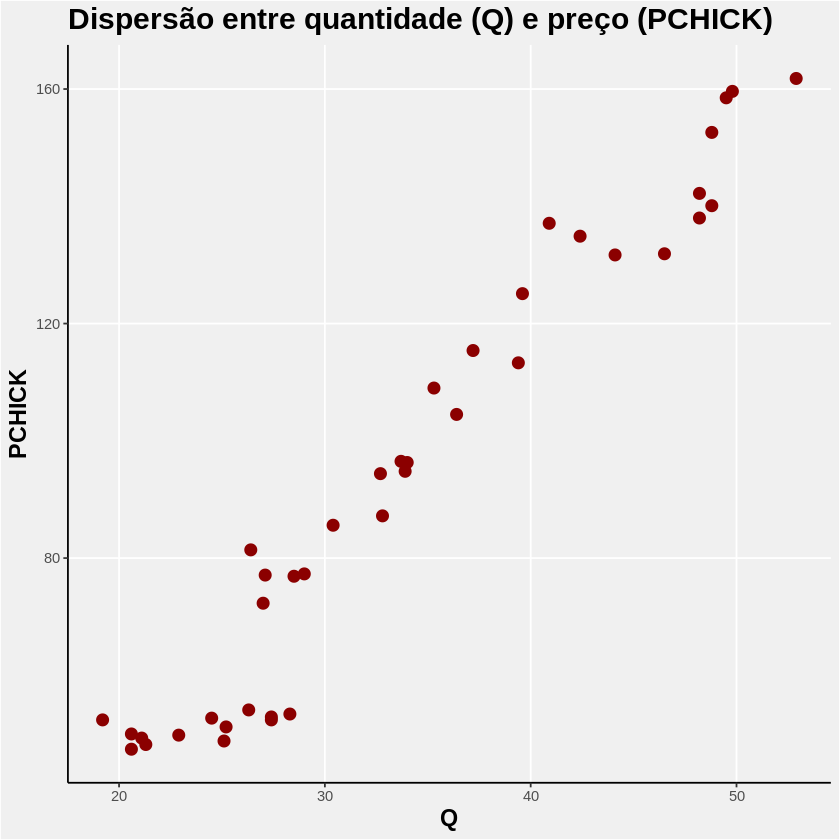

In [ ]:
ggplot( dat, aes( x = Q, y = PCHICK ) ) +
  geom_point( color = 'darkred', size = 3 ) + 
  labs(title = "Dispersão entre quantidade (Q) e preço (PCHICK)",
       x = "Q",
       y = "PCHICK") +
         theme_classic() +
  theme(plot.title = element_text(size = 18, face = "bold"),
        axis.title.x = element_text(size = 14, face = "bold"),
        axis.title.y = element_text(size = 14, face = "bold")
        ) +
  theme(panel.background = element_rect(fill = "#f0f0f0"),
        plot.background = element_rect(fill = "#f0f0f0"),
        panel.grid.major = element_line(colour = "white") )

## Modelo de regressão linear

Vamos estimar a regressão abaixo:

\begin{equation}
\ln \big[ PCHICK \big]_i = \beta_0 + \beta_1 * \ln \big[ Q \big]_i + \epsilon_i
\end{equation}



In [ ]:
reg_1 <- lm( log(PCHICK) ~ log(Q), data = dat )

summary(reg_1)


Call:
lm(formula = log(PCHICK) ~ log(Q), data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.28895 -0.06707  0.02709  0.07955  0.23150 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.38066    0.23707  -1.606    0.117    
log(Q)       1.39025    0.06789  20.477   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1245 on 38 degrees of freedom
Multiple R-squared:  0.9169,	Adjusted R-squared:  0.9147 
F-statistic: 419.3 on 1 and 38 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


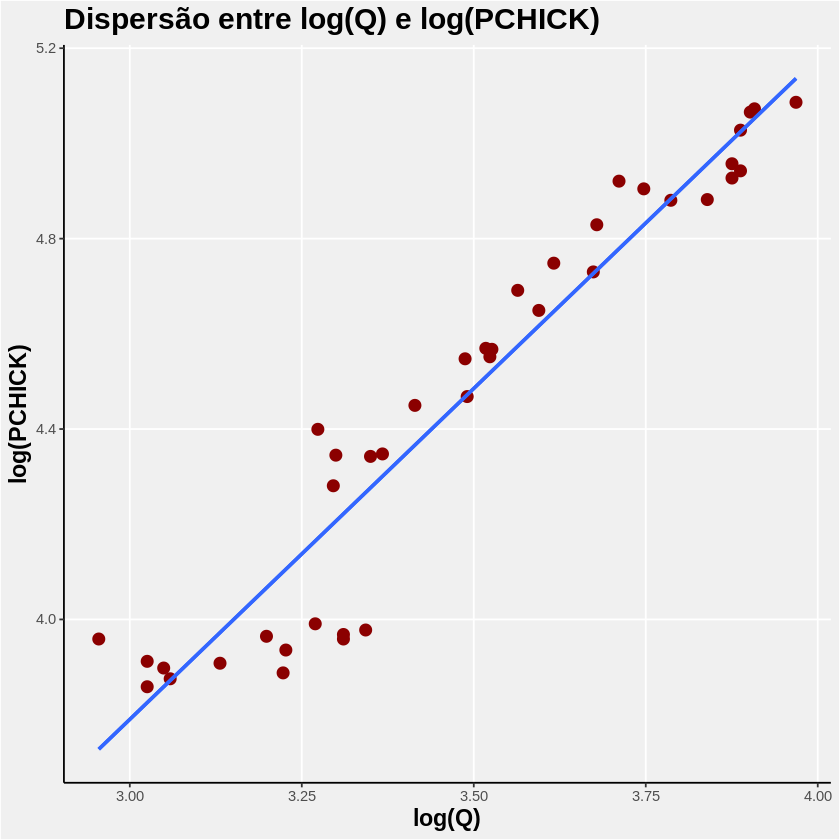

In [ ]:
ggplot(dat, aes( x = log(Q), y = log(PCHICK) ) ) +
  geom_point( color = 'darkred', size = 3 ) + 
  labs(title = "Dispersão entre log(Q) e log(PCHICK)",
       x = "log(Q)",
       y = "log(PCHICK)") +
         theme_classic() +
  theme(plot.title = element_text(size = 18, face = "bold"),
        axis.title.x = element_text(size = 14, face = "bold"),
        axis.title.y = element_text(size = 14, face = "bold")
        ) +
  theme(panel.background = element_rect(fill = "#f0f0f0"),
        plot.background = element_rect(fill = "#f0f0f0"),
        panel.grid.major = element_line(colour = "white") ) +
    stat_smooth(method = lm, se = FALSE) + 
     geom_smooth(method = lm, se = FALSE, fullrange = TRUE)

> ### Qual é a conclusão que obtemos?

- Relação positiva entre quantidade (Q) e preço do frango (PCHICK), o que não faz sentido do ponto de vista econômico, uma vez que para uma curva de demanda, espera-se que a relação preço-quantidade seja negativa

## Modelo de regressão com variáveis instrumentais

### [1] Primeiro estágio



Vamos estimar a regressão abaixo:

\begin{equation}
\ln \big[ PCHICK \big]_i = \beta_0 + \beta_1 * \ln \big[PF \big]_i + \beta_2 * \ln \big[ PCOR  \big]_i + v_i
\end{equation}

In [ ]:
reg_2 <- lm( log(PCHICK) ~ log(PF) + log(PCOR), data = dat )

summary(reg_2)


Call:
lm(formula = log(PCHICK) ~ log(PF) + log(PCOR), data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.23888 -0.03667  0.00334  0.03797  0.41924 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.51817    0.20306   2.552    0.015 *  
log(PF)      1.43543    0.09942  14.438  < 2e-16 ***
log(PCOR)   -0.57406    0.11082  -5.180 8.07e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1075 on 37 degrees of freedom
Multiple R-squared:  0.9396,	Adjusted R-squared:  0.9364 
F-statistic: 287.9 on 2 and 37 DF,  p-value: < 2.2e-16


> ### Será que o instrumento é relevante?

- Nessa nova regressão, o resultado estima o preço do frango (PCHICK) com base em fatores de oferta, mostrando que:
 
 - Quanto maior o preço da ração do frango (PF), maior o preço do frango (PCHICK)
 - Quanto maior o preço do milho (PCOR), menor o preço do frango (PCHICK)

Agora, vamos criar uma previsão (o fit do modelo) com base na regressão anterior. Vamos utilizar a função 'predict', na qual criamos uma variável com 'predict( modelo )', onde 'modelo' é o nome do modelo que queremos utilizar (no nosso caso, o modelo anterior).

In [ ]:
PCHICK_ESTIMATED <- predict( reg_2, dat, type = "response")

Adicione a variável acima à base de dados 'dat'.

In [ ]:
dat$PCHICK_ESTIMATED <- exp(PCHICK_ESTIMATED)

In [ ]:
dat$PCHICK_RESIDUAL <- (dat$PCHICK_ESTIMATED / dat$PCHICK - 1)

In [ ]:
head(dat, 5)

,YEAR,Q,Y,PCHICK,PBEEF,PCOR,PF,CPI,QPRODA,POP,MEATEX,TIME,PCHICK_ESTIMATED,PCHICK_RESIDUAL
,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>
1,1960,19.2,9210,52.4,33.5,46.0,51.53361,29.6,4333602,180.671,50,51,53.46880,0.02039688
2,1961,20.6,9361,47.4,33.0,45.1,51.86824,29.9,4944130,183.691,49,52,54.58352,0.15155099
3,1962,20.6,9666,50.0,34.2,44.8,52.09133,30.2,4997189,186.538,46,53,55.13165,0.10263302
4,1963,21.1,9886,49.3,33.8,49.8,50.97588,30.6,5269019,189.242,80,54,50.29537,0.02019011
5,1964,21.3,10456,48.2,32.8,49.9,50.75279,31.0,5443769,191.889,78,55,49.92220,0.03573020


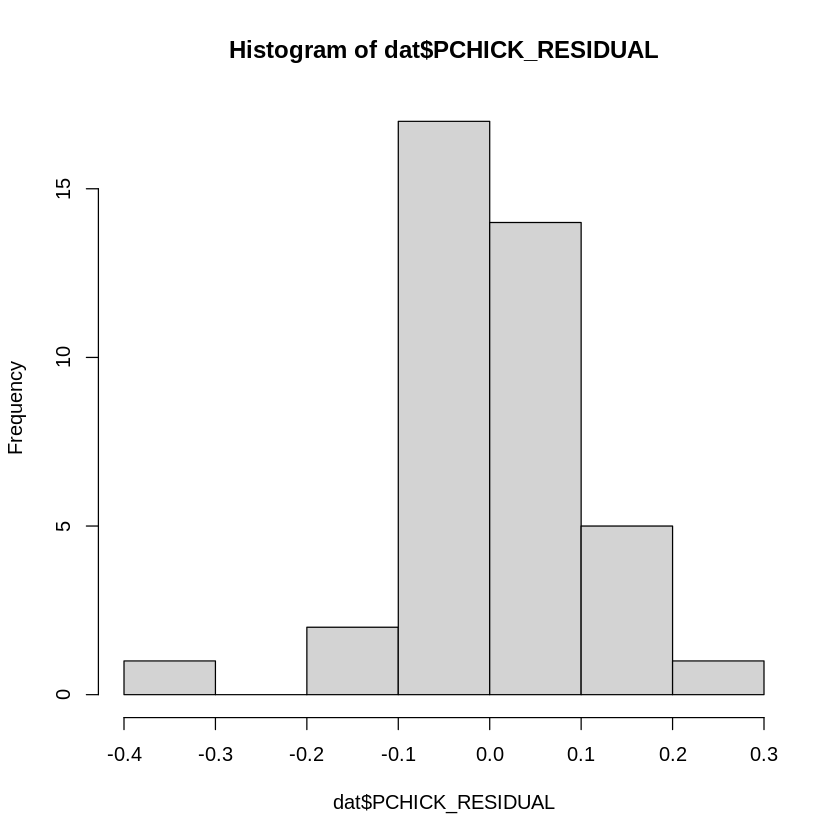

In [ ]:
hist(dat$PCHICK_RESIDUAL)

### [2] Segundo estágio (sem controles)

Vamos estimar a regressão abaixo:

\begin{equation}
\ln \big[ Q \big]_i = \beta_0 + \beta_1 * \ln \big[ \hat{PCHICK} \big]_i + u_i
\end{equation}

In [ ]:
reg_3 <- lm( log(Q) ~ log(PCHICK_ESTIMATED), data = dat )

summary(reg_3)


Call:
lm(formula = log(Q) ~ log(PCHICK_ESTIMATED), data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.21549 -0.08254  0.00208  0.09152  0.35271 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            0.59510    0.21291   2.795  0.00809 ** 
log(PCHICK_ESTIMATED)  0.64721    0.04757  13.605 3.48e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1227 on 38 degrees of freedom
Multiple R-squared:  0.8297,	Adjusted R-squared:  0.8252 
F-statistic: 185.1 on 1 and 38 DF,  p-value: 3.483e-16


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


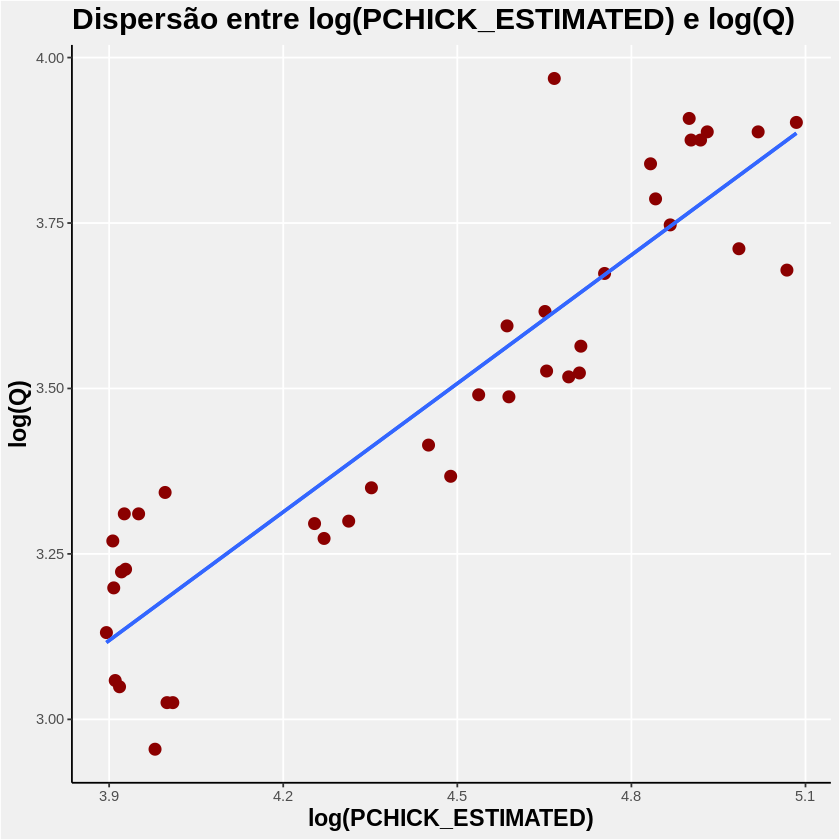

In [ ]:
ggplot(dat, aes( x = log(PCHICK_ESTIMATED), y = log(Q) ) ) +
  geom_point( color = 'darkred', size = 3 ) + 
  labs(title = "Dispersão entre log(PCHICK_ESTIMATED) e log(Q)",
       x = "log(PCHICK_ESTIMATED)",
       y = "log(Q)") +
         theme_classic() +
  theme(plot.title = element_text(size = 18, face = "bold"),
        axis.title.x = element_text(size = 14, face = "bold"),
        axis.title.y = element_text(size = 14, face = "bold")
        ) +
  theme(panel.background = element_rect(fill = "#f0f0f0"),
        plot.background = element_rect(fill = "#f0f0f0"),
        panel.grid.major = element_line(colour = "white") ) +
    stat_smooth(method = lm, se = FALSE) + 
     geom_smooth(method = lm, se = FALSE, fullrange = TRUE)

### [3] Segundo estágio (alguns controles): 



\begin{equation}
\ln \big[ Q \big]_i = \beta_0 + \beta_1 * \ln \big[ \hat{PCHICK} \big]_i + \beta_2 * \ln \big[ Y \big]_i  + \beta_3 * PBEEF_i + \varepsilon_i
\end{equation}

In [ ]:
reg_4 <- lm( log(Q) ~ log(PCHICK_ESTIMATED) + log(Y) + PBEEF, data = dat )

summary(reg_4)


Call:
lm(formula = log(Q) ~ log(PCHICK_ESTIMATED) + log(Y) + PBEEF, 
    data = dat)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.084762 -0.031387  0.004673  0.031260  0.069740 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -2.0409467  0.7403505  -2.757  0.00911 ** 
log(PCHICK_ESTIMATED) -0.2451695  0.0547915  -4.475 7.39e-05 ***
log(Y)                 0.6370967  0.0812100   7.845 2.64e-09 ***
PBEEF                  0.0055923  0.0007223   7.743 3.57e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.04014 on 36 degrees of freedom
Multiple R-squared:  0.9827,	Adjusted R-squared:  0.9813 
F-statistic: 683.2 on 3 and 36 DF,  p-value: < 2.2e-16


### [4] Segundo estágio (modelo completo): 

\begin{equation}
\ln \big[ Q \big]_i = \beta_0 + \beta_1 * \ln \big[ \hat{PCHICK} \big]_i + \beta_2 * \ln \big[ Y \big]_i  + \beta_3 * \ln \big[ CPI \big]_i + \beta_4 * PBEEF_i + \beta_5 * POP_i + \varepsilon_i
\end{equation}

In [ ]:
reg_5 <- lm( log(Q) ~ log(PCHICK_ESTIMATED) + log(Y) + log(PBEEF) + log(CPI) + PBEEF + POP, data = dat )

summary(reg_5)


Call:
lm(formula = log(Q) ~ log(PCHICK_ESTIMATED) + log(Y) + log(PBEEF) + 
    log(CPI) + PBEEF + POP, data = dat)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.059489 -0.015259  0.001667  0.020502  0.046477 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -3.136917   0.920560  -3.408 0.001742 ** 
log(PCHICK_ESTIMATED) -0.108241   0.047387  -2.284 0.028926 *  
log(Y)                 0.812583   0.150135   5.412 5.46e-06 ***
log(PBEEF)            -0.388844   0.105753  -3.677 0.000833 ***
log(CPI)              -0.008705   0.079227  -0.110 0.913170    
PBEEF                  0.007349   0.001331   5.522 3.95e-06 ***
POP                    0.001555   0.001551   1.003 0.323278    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02771 on 33 degrees of freedom
Multiple R-squared:  0.9925,	Adjusted R-squared:  0.9911 
F-statistic: 724.1 on 6 and 33 DF,  p-value: < 2.2e-16
